In [1]:
!python -V

Python 3.9.12


In [11]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [12]:
import warnings
warnings.filterwarnings('ignore')

# Data Loading

In [13]:
import src.utils as utils

In [94]:
params = utils.read_params(config_path='../params.yaml')

[2024-01-06 18:31:21,337: INFO: utils]: Reading config from ../params.yaml


In [15]:
params

{'base': {'project': 'StockPrediction', 'random_state': 42},
 'data_source': {'raw_source': 'data/raw/'},
 'load_data': {'processed_source': 'data/processed/'}}

In [19]:
os.listdir(os.path.join("..", params['data_source']['raw_source']))

['AAPL_data.csv',
 'AMZN_data.csv',
 'GOOGL_data.csv',
 'HP_data.csv',
 'IBM_data.csv',
 'NVDA_data.csv']

In [20]:
CSVS = [os.path.join("..", params['data_source']['raw_source'], csv) for csv in os.listdir(os.path.join("..", params['data_source']['raw_source'])) if csv.endswith(".csv")]

In [21]:
CSVS

['..\\data/raw/AAPL_data.csv',
 '..\\data/raw/AMZN_data.csv',
 '..\\data/raw/GOOGL_data.csv',
 '..\\data/raw/HP_data.csv',
 '..\\data/raw/IBM_data.csv',
 '..\\data/raw/NVDA_data.csv']

In [24]:
df = pd.concat([pd.read_csv(csv) for csv in CSVS], axis=0)

In [25]:
df.shape

(7554, 7)

In [26]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [27]:
df.describe()

,open,high,low,close,volume
count,7554.000000,7554.00000,7554.000000,7554.000000,7.554000e+03
mean,276.919606,279.23813,274.378244,276.917367,1.280463e+07
std,290.473020,292.61845,288.015558,290.455560,2.335958e+07
min,12.070000,12.29000,12.040000,12.126000,3.248960e+05
25%,69.147500,70.00250,68.326950,69.072500,2.175206e+06
50%,152.275000,153.33500,151.365000,152.370000,3.794822e+06
75%,426.395000,430.23965,423.114600,425.875025,9.246296e+06
max,1477.390000,1498.00000,1450.040000,1450.890000,2.668336e+08


In [29]:
df.duplicated().sum()

0

# EDA

In [30]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


[2024-01-06 18:03:30,372: INFO: category]: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2024-01-06 18:03:30,430: INFO: category]: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


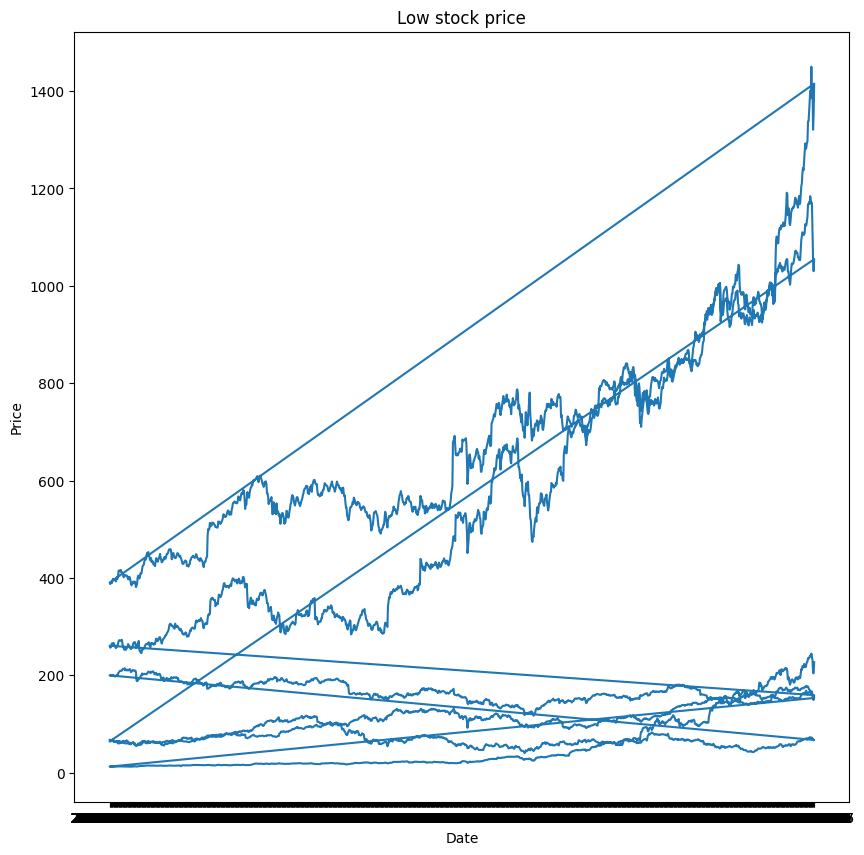

In [32]:
plt.figure(figsize=(10, 10))
plt.title("Low stock price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.plot(df['date'], df['low'])
plt.show()

In [33]:
CSVS

['..\\data/raw/AAPL_data.csv',
 '..\\data/raw/AMZN_data.csv',
 '..\\data/raw/GOOGL_data.csv',
 '..\\data/raw/HP_data.csv',
 '..\\data/raw/IBM_data.csv',
 '..\\data/raw/NVDA_data.csv']

[2024-01-06 18:08:30,869: INFO: category]: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2024-01-06 18:08:30,936: INFO: category]: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2024-01-06 18:08:31,006: INFO: category]: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2024-01-06 18:08:31,060: INFO: category]: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


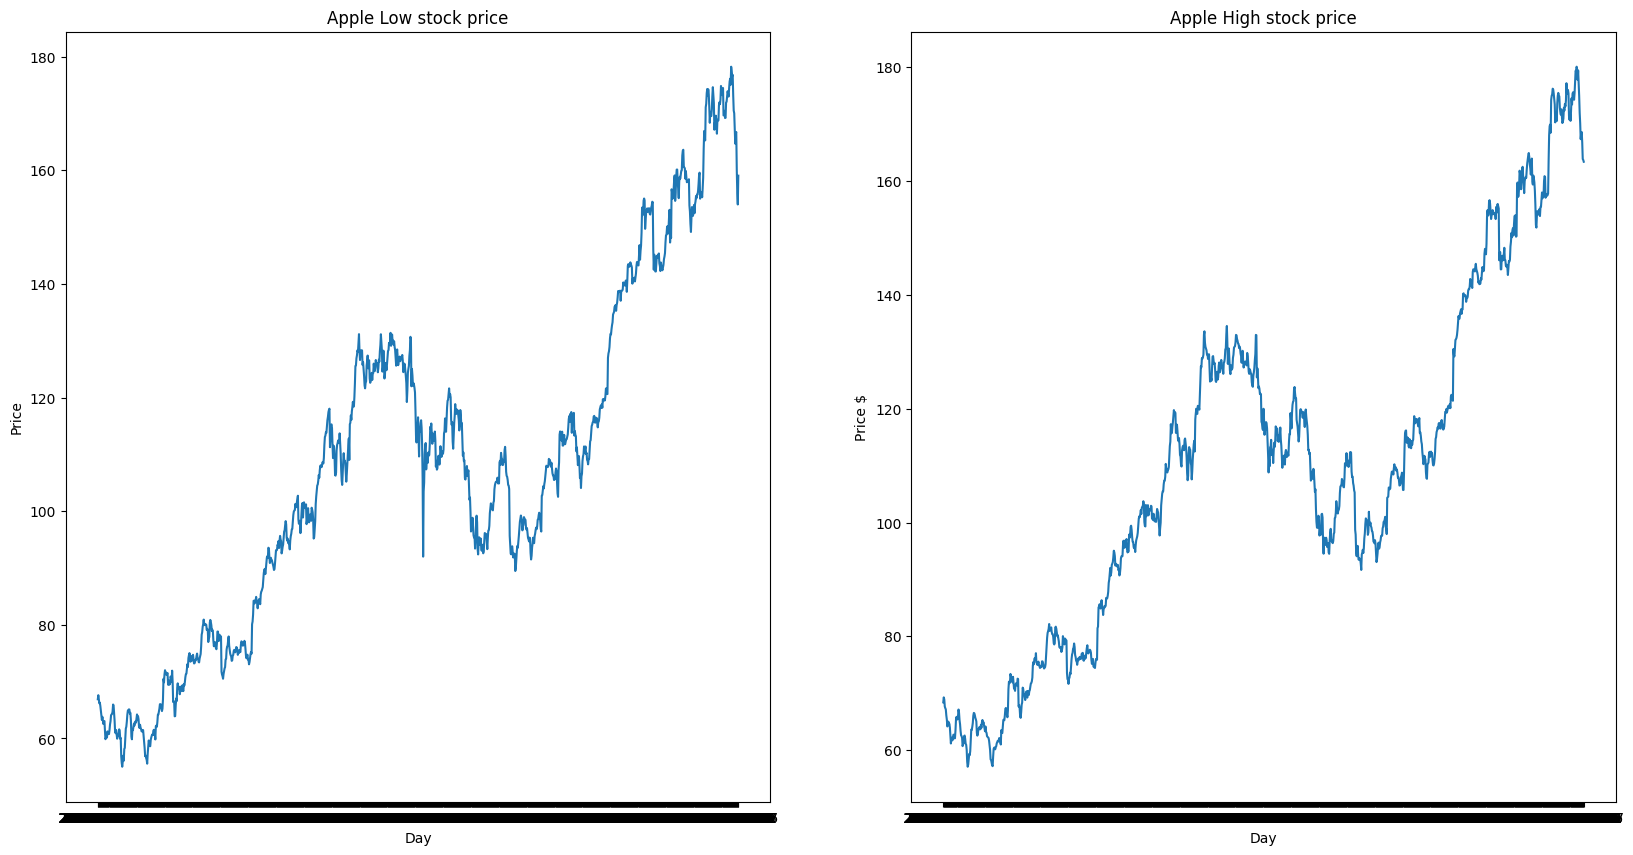

In [37]:
_temp = pd.read_csv(CSVS[0])
plt.figure(figsize=(20, 10))
figure = plt.subplot(1, 2, 1)
plt.title("Apple Low stock price")
plt.xlabel("Day")
plt.ylabel("Price")
plt.plot(_temp['date'], _temp['low'])

figure = plt.subplot(1, 2, 2)
plt.title("Apple High stock price")
plt.xlabel("Day")
plt.ylabel("Price $")
plt.plot(_temp['date'], _temp['high'])
plt.show()

In [40]:
_temp

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL
...,...,...,...,...,...,...,...
1254,2018-02-01,167.1650,168.6200,166.7600,167.7800,47230787,AAPL
1255,2018-02-02,166.0000,166.8000,160.1000,160.5000,86593825,AAPL
1256,2018-02-05,159.1000,163.8800,156.0000,156.4900,72738522,AAPL
1257,2018-02-06,154.8300,163.7200,154.0000,163.0300,68243838,AAPL


In [42]:
plt.figure(1, figsize=(20, 10))
cr = sns.heatmap(df.corr(), annot=True)
plt.show()

ValueError: could not convert string to float: '2013-02-08'

<Figure size 2000x1000 with 0 Axes>

In [67]:
x = df[['open','volume']]
y = df[['close']]

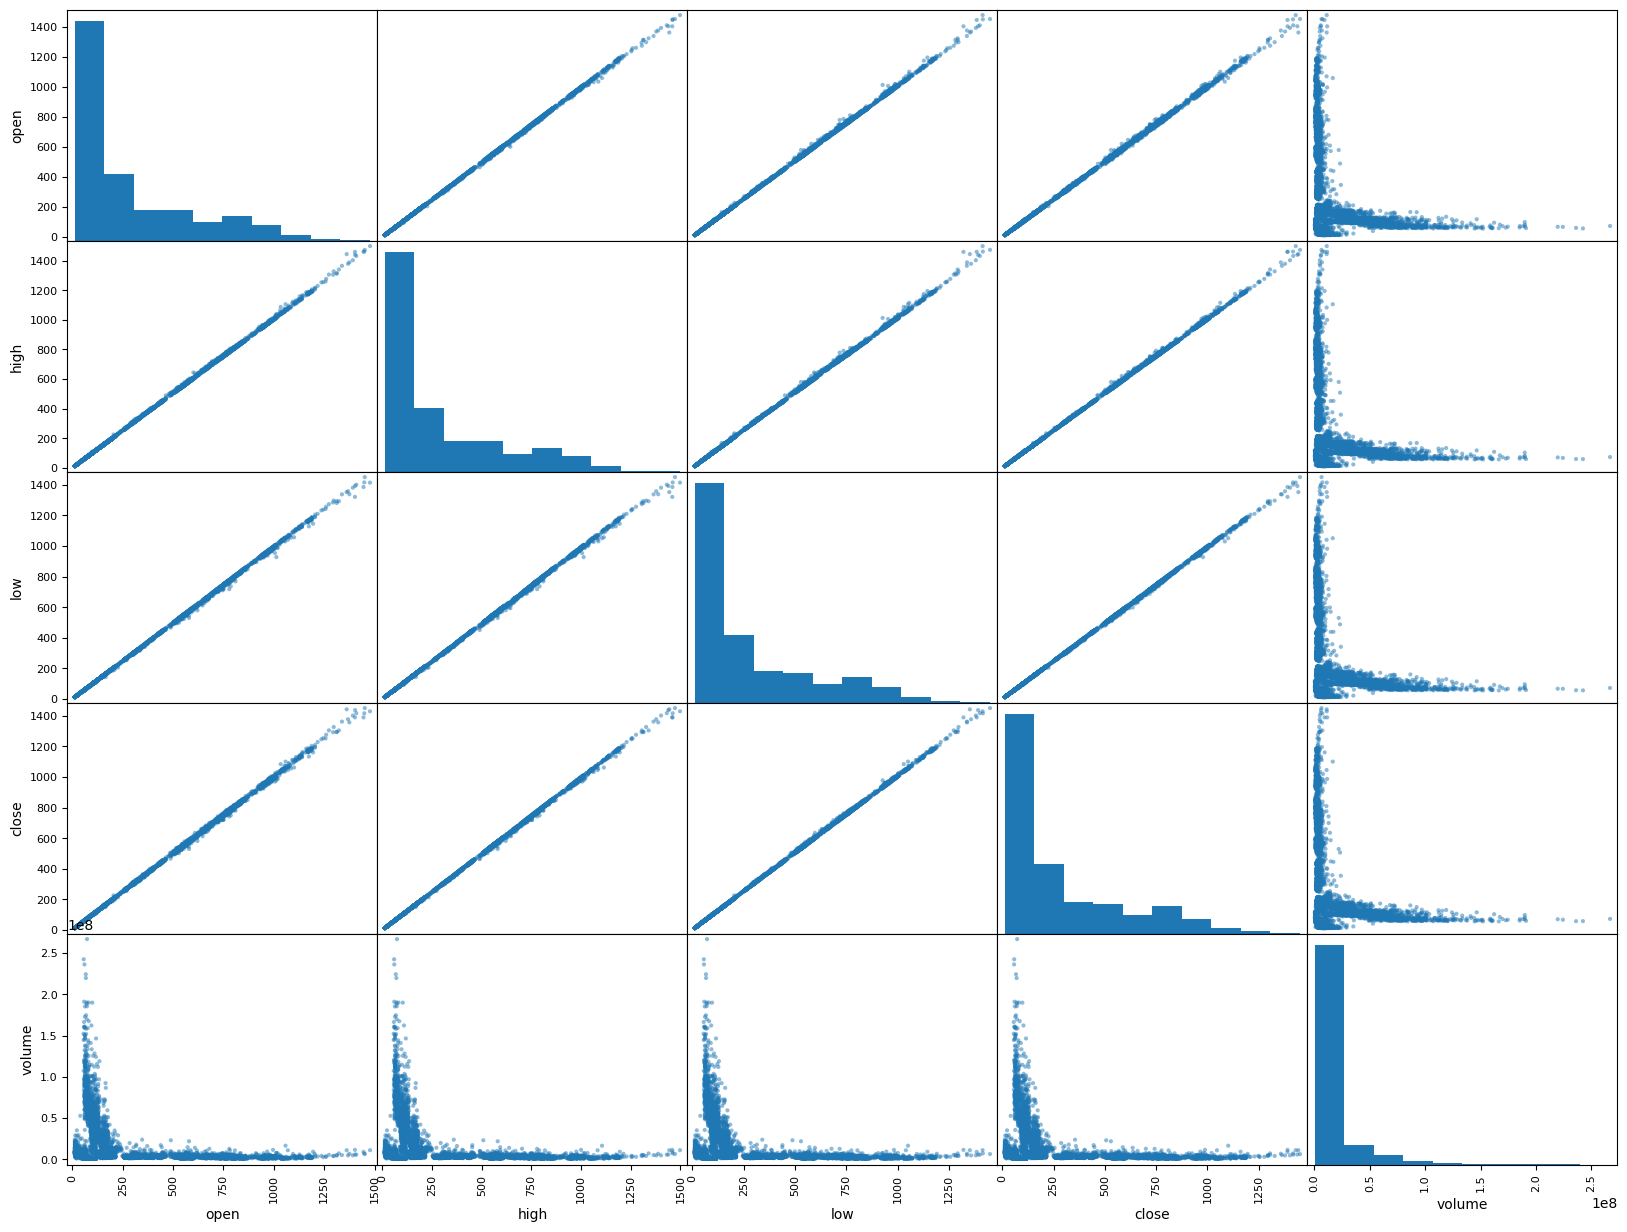

In [49]:
pd.plotting.scatter_matrix(df,figsize=(20, 15), alpha=.5)
plt.show()

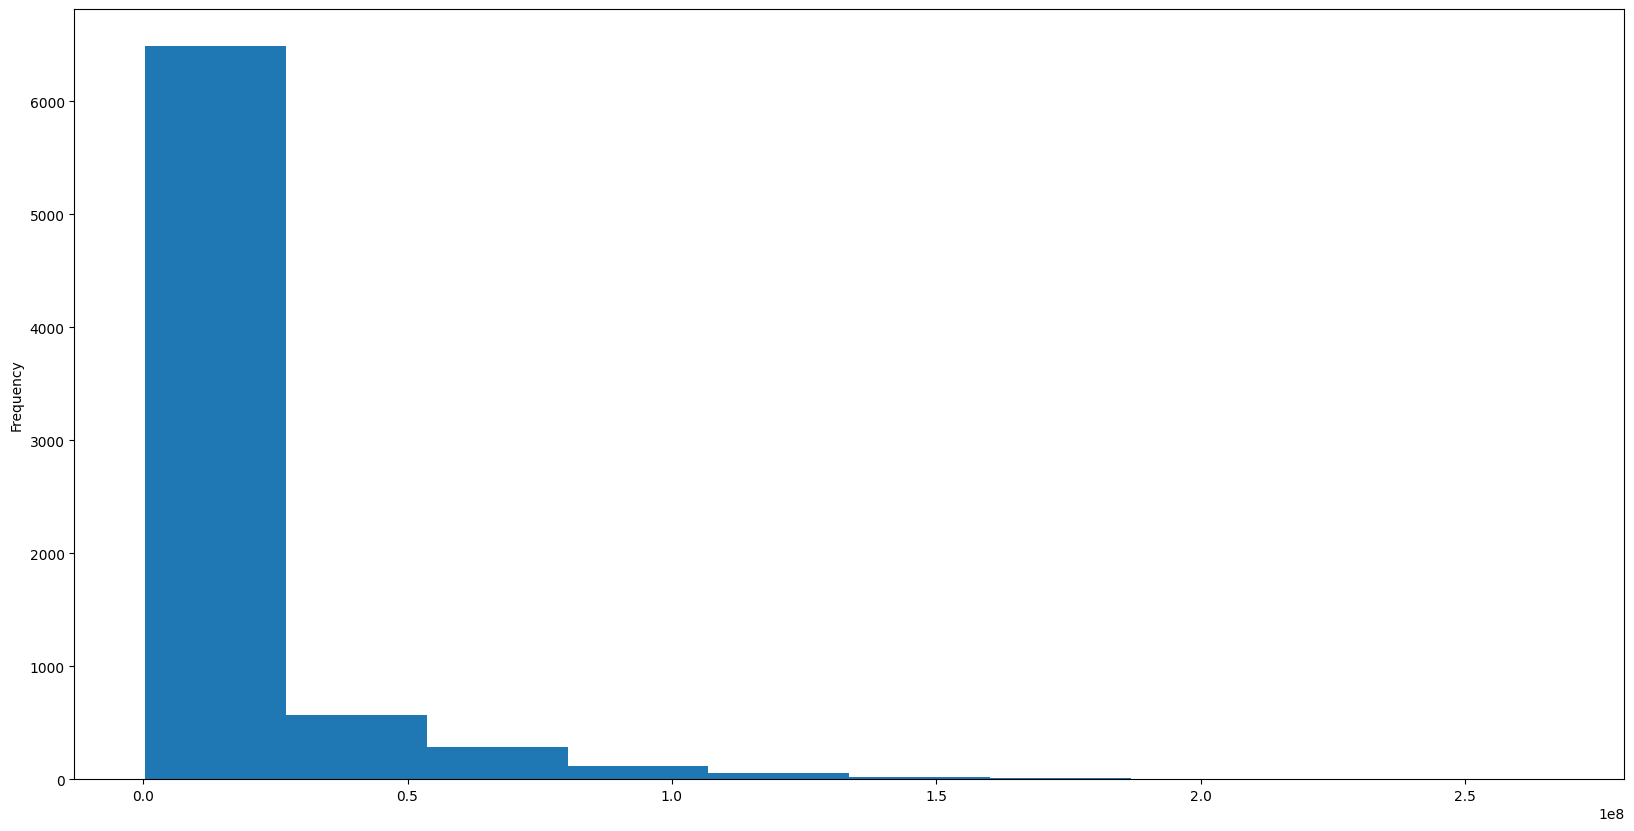

In [50]:
x['volume'].plot(kind='hist', figsize=(20, 10))
plt.show()

<Axes: ylabel='Density'>

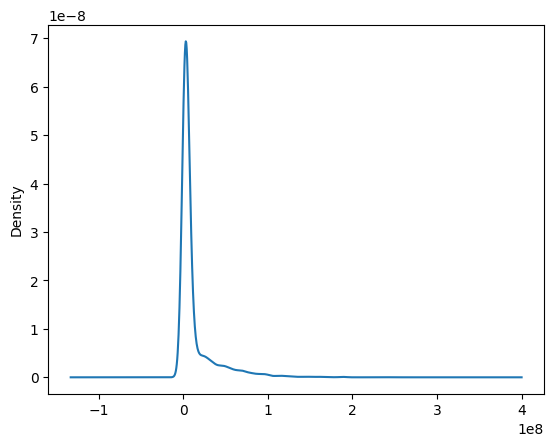

In [54]:
x['volume'].plot(kind='kde')

<Axes: ylabel='Density'>

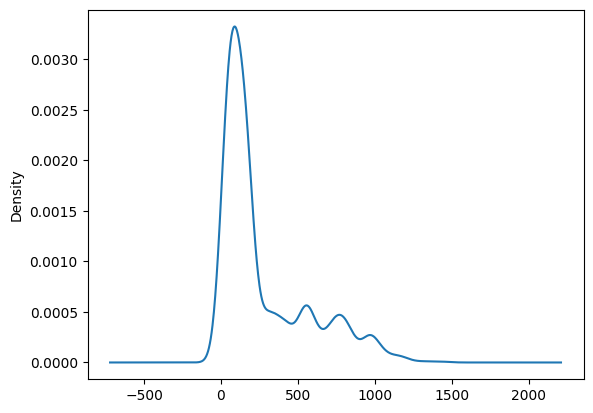

In [55]:
x['open'].plot(kind='kde')

<Axes: ylabel='Frequency'>

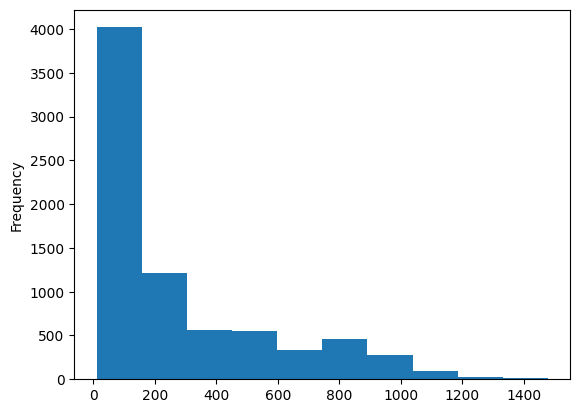

In [56]:
x['open'].plot(kind='hist')

# Insides
Features are not following normal distribution. So to get batter model we have transform this, in a way that follows the normal distribution pattern

In [57]:
x.head()

,open,volume
0,67.7142,158168416
1,68.0714,129029425
2,68.5014,151829363
3,66.7442,118721995
4,66.3599,88809154


In [58]:
from scipy import stats as st

In [59]:
x['volume'], _ = pd.Series(st.boxcox(x['volume']))

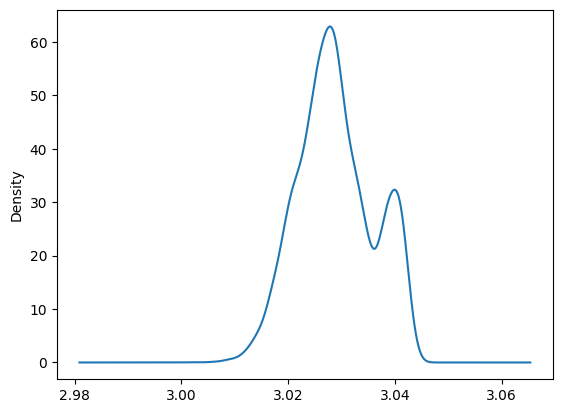

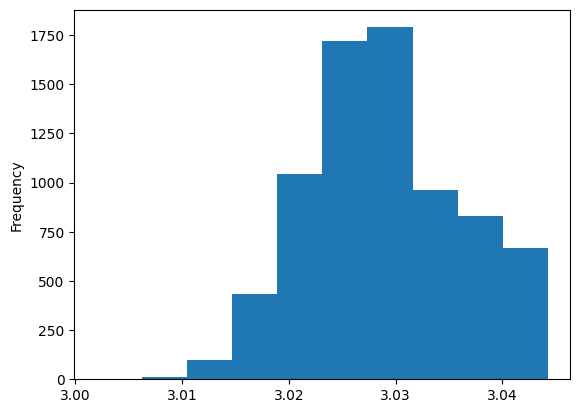

In [61]:
x['volume'].plot(kind='kde')
plt.show()
x['volume'].plot(kind='hist')
plt.show()

In [62]:
x['open'],_ = pd.Series(st.boxcox(x['open']))

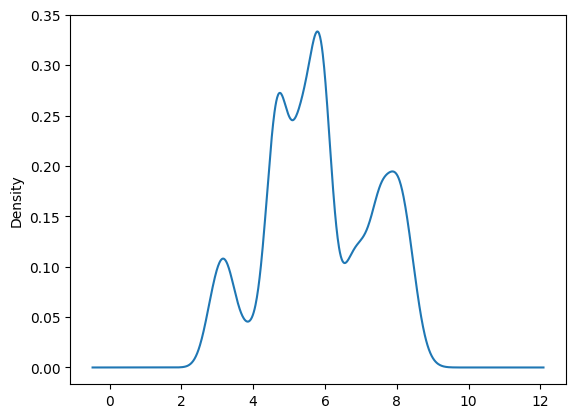

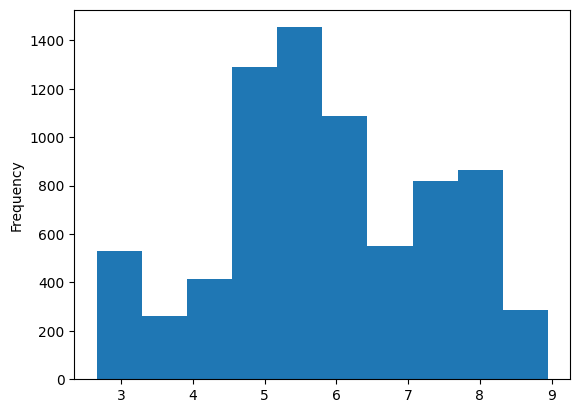

In [63]:
x['open'].plot(kind='kde')
plt.show()
x['open'].plot(kind='hist')
plt.show()

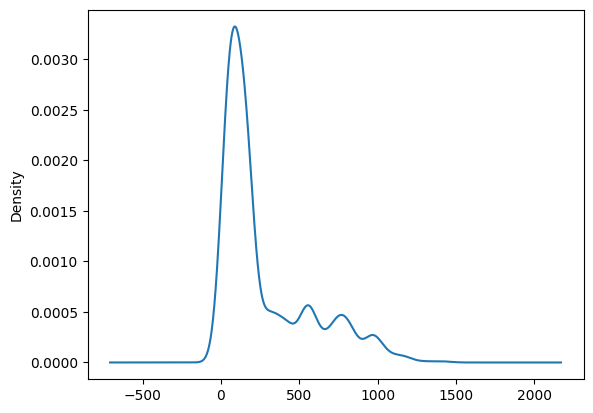

In [72]:
y['close'].plot(kind='kde')
plt.show()

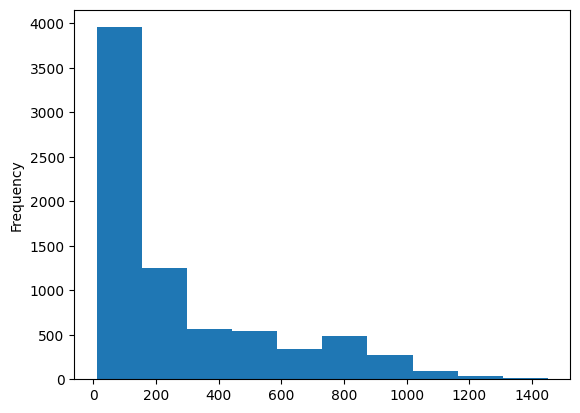

In [73]:
y['close'].plot(kind='hist')
plt.show()

In [74]:
y['close'],_ = pd.Series(st.boxcox(y['close']))

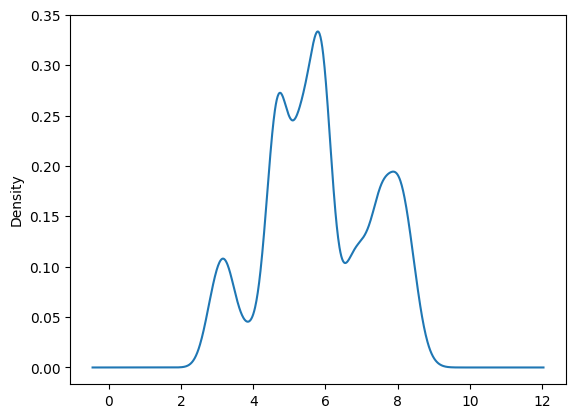

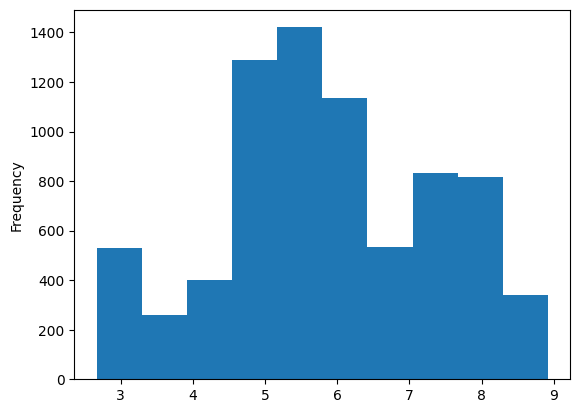

In [75]:
y['close'].plot(kind='kde')
plt.show()
y['close'].plot(kind='hist')
plt.show()

In [84]:
x.head(5)

,open,volume
0,4.734093,3.043284
1,4.740701,3.042852
2,4.748613,3.043199
3,4.715980,3.042668
4,4.708735,3.041982


In [85]:
y.head(5)

,close
0,4.735689
1,4.748710
2,4.716842
3,4.714452
4,4.713324


In [90]:
data = pd.concat([x, y], axis=1)

In [91]:
data.head()

,open,volume,close
0,4.734093,3.043284,4.735689
1,4.740701,3.042852,4.748710
2,4.748613,3.043199,4.716842
3,4.715980,3.042668,4.714452
4,4.708735,3.041982,4.713324


In [92]:
data.shape

(7554, 3)

In [95]:
data.to_csv(os.path.join("..", params['data_source']['precessed'], "data.csv"), index=False)

In [1]:
data

NameError: name 'data' is not defined